# Calculation of stress exponent($n$) and activation energy($Q$) from strain rate vs strain.

The strain rate $\dot{\epsilon}$ vs strain $\epsilon$ data has been taken from the work of REED et_al [1]. The plot data from Figure 9 in [1] has been converted to csv data points and are stored in the `DATA_Reed_etal` directory. The file names are in the format \<Pressure\>Mpa_\<Temperature\>C.csv. The following lines read and plot the data.

### Imports
The necessary python module imports and setting the default font style for matplotlib.

In [12]:
from numpy import genfromtxt
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams.update({'font.size': 12,'font.family':'serif'})
import numpy as np

### Sort function
The data in the .csv files have to be sorted to plot properly. 

In [13]:
def sortbyXaxis(data):
    ind = data.argsort()[0]
    ret = data
    ret[0] = data[0][ind]
    ret[1] = data[1][ind]
    return ret

## Data
The following lines read the data, scale it and plots accordingly.

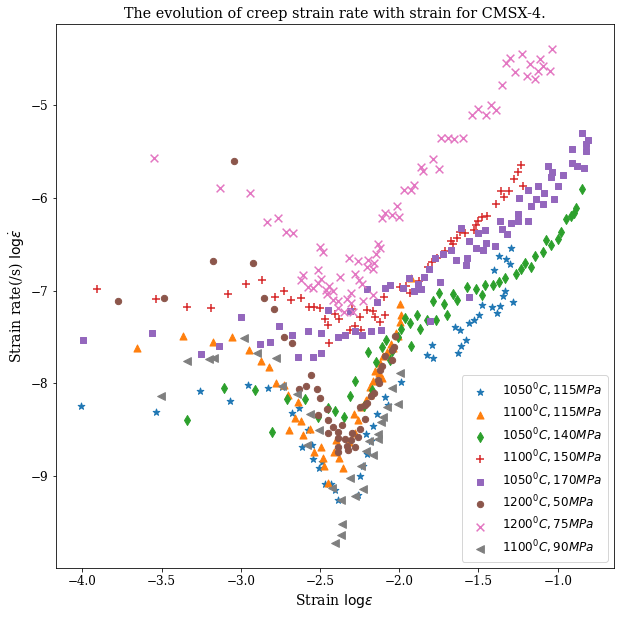

In [14]:
MPa115_1050C = sortbyXaxis(np.transpose(genfromtxt('DATA_Reed_etal/115MPa_1050C.csv', delimiter=',')))
MPa115_1100C = np.transpose(genfromtxt('DATA_Reed_etal/115MPa_1100C.csv', delimiter=','))
MPa140_1050C = sortbyXaxis(np.transpose(genfromtxt('DATA_Reed_etal/140MPa_1050C.csv', delimiter=',')))
MPa150_1100C = np.transpose(genfromtxt('DATA_Reed_etal/150MPa_1100C.csv', delimiter=','))
MPa170_1050C = sortbyXaxis(np.transpose(genfromtxt('DATA_Reed_etal/170MPa_1050C.csv', delimiter=',')))
MPa50_1200C = np.transpose(genfromtxt('DATA_Reed_etal/50MPa1200C.csv', delimiter=','))
MPa75_1200C = np.transpose(genfromtxt('DATA_Reed_etal/75MPa1200C.csv', delimiter=','))
MPa90_1100C = np.transpose(genfromtxt('DATA_Reed_etal/90MPa_1100C.csv', delimiter=','))

plt.figure(figsize=(10,10))

plt.scatter(MPa115_1050C[0],MPa115_1050C[1],marker="*",s=50)
plt.scatter(MPa115_1100C[0],MPa115_1100C[1],marker="^",s=50)
plt.scatter(MPa140_1050C[0],MPa140_1050C[1],marker="d",s=50)
plt.scatter(MPa150_1100C[0],MPa150_1100C[1],marker="+",s=60)
plt.scatter(MPa170_1050C[0],MPa170_1050C[1],marker="s",s=30)
plt.scatter(MPa50_1200C[0],MPa50_1200C[1],marker="o",s=40)
plt.scatter(MPa75_1200C[0],MPa75_1200C[1],marker="x",s=60)
plt.scatter(MPa90_1100C[0],MPa90_1100C[1],marker="<",s=60)

leg = plt.legend(["$1050^0C,115MPa$","$1100^0C,115MPa$","$1050^0C,140MPa$","$1100^0C,150MPa$","$1050^0C,170MPa$","$1200^0C,50MPa$","$1200^0C,75MPa$","$1100^0C,90MPa$"], labelspacing=0.4, borderpad=0.5,fontsize=12,loc=4)
plt.ylabel("Strain rate(/s) $\log{\dot{\epsilon}}$",fontsize=14)
plt.xlabel("Strain $\log{\epsilon}$",fontsize=14)
plt.title("The evolution of creep strain rate with strain for CMSX-4.")

plt.show()

# Find the steady state creep rate $\dot{\epsilon}$ in all cases
To find the steady state creep rate we will fit the respective data into a polynomial, find the range of strain values for which the polynomial has a steady state value. That region will give us the steady state creep region and the creep rate.

In [15]:
def get_SS_Creep_Rate(DATA,titletext,ssmin, ssmax): 
    DATA = np.exp(DATA)
    pol = np.poly1d(np.polyfit(DATA[0], DATA[1], 7))
    
    plt.figure(figsize=(6,6))
    plt.scatter(DATA[0], DATA[1],color='white',edgecolor='orange',marker='s',s=60)
    plt.plot(DATA[0], pol(DATA[0]),'b',linewidth=0.5)
    
    cond = np.logical_and((DATA[0]>ssmin),(DATA[0]<ssmax))
    ssdata = DATA[0][cond]
    pol = np.poly1d(np.polyfit(ssdata, DATA[1][cond], 0))
    plt.plot(ssdata, pol(ssdata),"r--",linewidth=2)
    
    ssYax = '%.2E' % pol[0]
    plt.text(ssmax,pol[0],ssYax,bbox=dict(boxstyle="square", ec=(1., 0.5, 0.5),fc=(1., 1, 1),))
    
    leg = plt.legend(["Curve Fit","Steady State", "Raw data"],
                 labelspacing=0.4, borderpad=0.5,fontsize=10)
    
    plt.ylabel("Strain rate(/s) $\dot{\epsilon}$")
    plt.xlabel("Strain $\epsilon$")
    plt.title(titletext)
    plt.show()
    
    return pol[0]

### Calculating the SS creep rates for all temperature and pressures available.

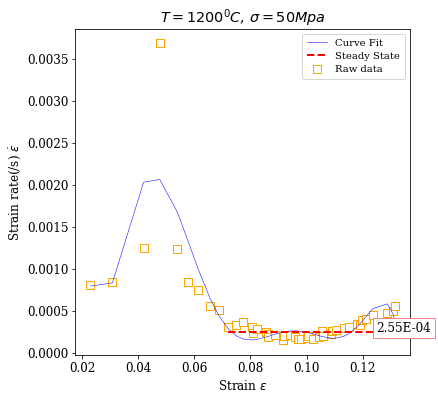

In [16]:
SSCR_50_1200 = get_SS_Creep_Rate(MPa50_1200C,"$T=1200^0C$, $\sigma=50Mpa$", 0.07,0.125)

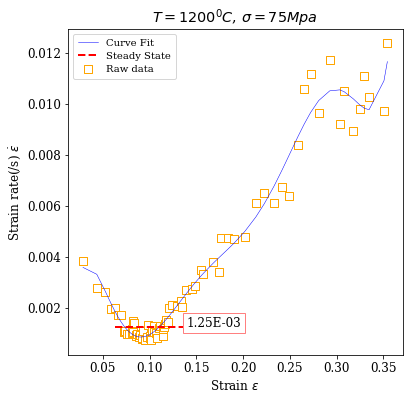

In [17]:
SSCR_75_1200 = get_SS_Creep_Rate(MPa75_1200C,"$T=1200^0C$, $\sigma=75Mpa$", 0.06,0.14)

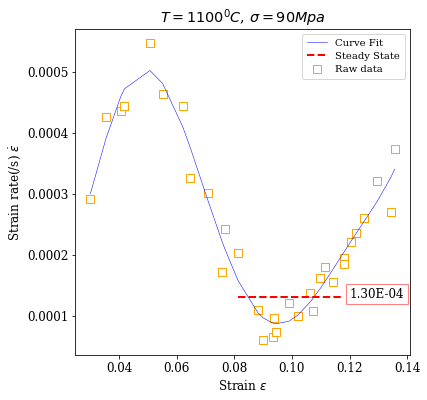

In [18]:
SSCR_90_1100 = get_SS_Creep_Rate(MPa90_1100C,"$T=1100^0C$, $\sigma=90Mpa$", 0.08,0.12)

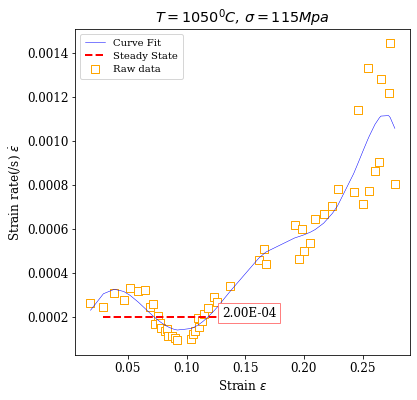

In [19]:
SSCR_115_1050 = get_SS_Creep_Rate(MPa115_1050C,"$T=1050^0C$, $\sigma=115Mpa$", 0.02,0.13)

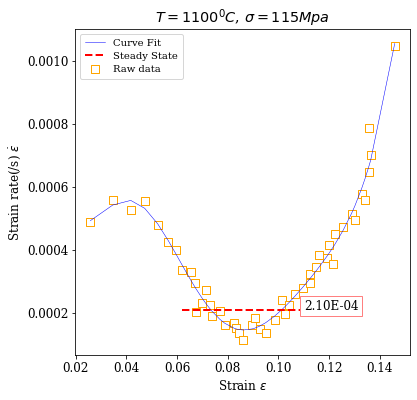

In [20]:
SSCR_115_1100 = get_SS_Creep_Rate(MPa115_1100C,"$T=1100^0C$, $\sigma=115Mpa$", 0.06,0.11)

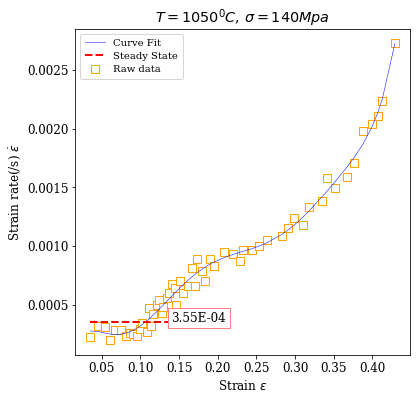

In [21]:
SSCR_140_1050 = get_SS_Creep_Rate(MPa140_1050C,"$T=1050^0C$, $\sigma=140Mpa$", 0.01,0.14)

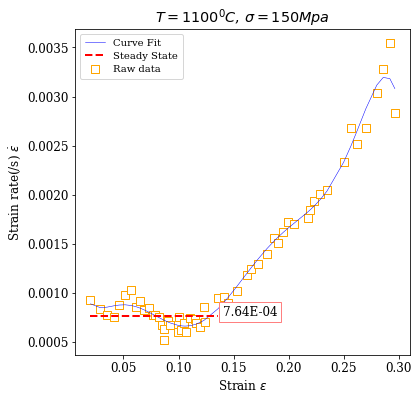

In [22]:
SSCR_150_1100 = get_SS_Creep_Rate(MPa150_1100C,"$T=1100^0C$, $\sigma=150Mpa$", 0.01,0.14)

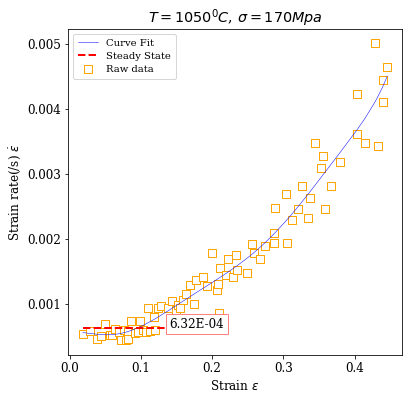

In [23]:
SSCR_170_1050 = get_SS_Creep_Rate(MPa170_1050C,"$T=1050^0C$, $\sigma=170Mpa$", 0.01,0.14)

# Calculating stress exponent $n$ and activation energy $Q$

Using the phenomenological creep equation:
$$ \dot{\epsilon} = A\exp{\frac{-Q}{RT}}\left(\frac{\sigma}{S}\right)^n$$

Here $A$ is some constant and $S$ is a reference stress state. For our convinience we will choose both $A$ and $S$ to be $1$. And so the final equation will be:
$$\dot{\epsilon} = \exp{\frac{-Q}{RT}}\sigma^n$$
$\implies$
$$log(\dot{\epsilon}) = n\log{\sigma} - \frac{Q}{RT}$$

The following data has been generated from the above analysis of steady state behavior in different creep curves:

In [24]:
SSTP_data = [[170, 1050, SSCR_170_1050],
            [150, 1100, SSCR_150_1100],
            [140, 1050, SSCR_140_1050],
            [115, 1050, SSCR_115_1050],
            [115, 1100, SSCR_115_1100],
            [90, 1100, SSCR_90_1100],
            [75, 1200, SSCR_75_1200],
            [50, 1200, SSCR_50_1200]]

## Stress exponent $n$ from plot of $log(\dot{\epsilon})$ and $log(\sigma)$ at different $T$

The following function reads the steady state creep rate data and plots a strain rate vs stress graph. 

In [25]:
def plot_strainrateVSstress(SSTP_data):
    SSTP_data = np.transpose(SSTP_data)
    plt.figure(figsize=(8,8))
    
    data = np.transpose(SSTP_data)[SSTP_data[1]==1050]
    data = np.log(data.transpose())
    plt.scatter(data[0], data[2],marker='o',s=120, color='white', edgecolor='red',label='_nolegend_')
    
    linedata = np.linspace(0,data[0][0],10)
    pol = np.poly1d(np.polyfit(data[0], data[2], 1))
    plt.plot(linedata, pol(linedata),"r--",linewidth=2)
    
    ssYax = 'Intercept=%.2f' % pol[0] + ", Slope=%0.2f" %pol[1]
    plt.plot([pol[0],pol[0],pol[0]],':',color='black',label='_nolegend_')
    plt.text(2,pol[0],ssYax,bbox=dict(boxstyle="square", ec=(0, 1, 0),fc=(1., 1, 1),))
    
    data = np.transpose(SSTP_data)[SSTP_data[1]==1100]
    data = np.log(data.transpose())
    plt.scatter(data[0], data[2],marker='s',s=120, color='white', edgecolor='blue',label='_nolegend_')
    
    linedata = np.linspace(0,data[0][0],10)
    pol = np.poly1d(np.polyfit(data[0], data[2], 1))
    plt.plot(linedata, pol(linedata),"b--",linewidth=2)
    
    ssYax = 'Intercept=%.2f' % pol[0] + ", Slope=%0.2f" %pol[1]
    plt.plot([pol[0],pol[0],pol[0]],':',color='black',label='_nolegend_')
    plt.text(2,pol[0],ssYax,bbox=dict(boxstyle="square", ec=(0,0,1),fc=(1., 1, 1),))
    
    data = np.transpose(SSTP_data)[SSTP_data[1]==1200]
    data = np.log(data.transpose())
    plt.scatter(data[0], data[2],marker='^',s=120, color='white', edgecolor='green',label='_nolegend_')
    
    linedata = np.linspace(0,data[0][0],10)
    pol = np.poly1d(np.polyfit(data[0], data[2], 1))
    plt.plot(linedata, pol(linedata),"g--",linewidth=2)
    
    ssYax = 'Intercept=%.2f' % pol[0] + ", Slope=%0.2f" %pol[1]
    plt.plot([pol[0],pol[0],pol[0]],':',color='black',label='_nolegend_')
    plt.text(2,pol[0],ssYax,bbox=dict(boxstyle="square", ec=(1, 0,0),fc=(1., 1, 1),))
    
    plt.legend(["$T=1050^0C$","$T=1100^0C$","$T=1200^0C$"])
    
    plt.ylabel("Strain rate(/s) $\log{\dot{\epsilon}}$")
    plt.xlabel("Stress $\log{\sigma}$")

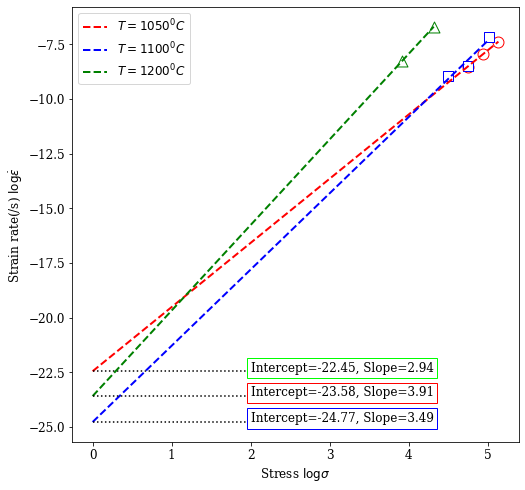

In [26]:
plot_strainrateVSstress(SSTP_data)

So we have found the Slopes and Intercepts $log(\dot{\epsilon})$ vs $log(\sigma)$ curves for three values of $T$. Now we calculate the values of $Q$ and $n$ using them. We know :

Slope of the curve $=n$(Stress exponent) and therefore the stress exponents are given as:

$$n_{1050^0C} = 3.91$$
$$n_{1100^0C} = 3.49$$
$$n_{1200^0C} = 2.94$$


Intercept of the curve with Y-axis $=-\frac{Q}{RT}$(where $Q$ is the Activation energy.)

$\implies$ $Q = -(Intercept)*R*T \implies$

$$Q_{1050^0C} = 259.3KJ/mol = [-(-23.58)*8.314*(1050+273) ]$$
$$Q_{1100^0C} = 282.7KJ/mol = [-(-24.77)*8.314*(1100+273) ]$$
$$Q_{1200^0C} = 274.9KJ/mol = [-(-22.45)*8.314*(1200+273) ]$$

## Activation energy $Q$ from plot of $log(\dot{\epsilon})$ and $\frac{1}{T}$ at different $\sigma$

In the mentioned reference, there is only one stress value repeated twice, which is $\sigma = 115Mpa$. therefore we must confine our attention to only that stress value.

In [27]:
def plot_strainrateVStemp(SSTP_data):
    SSTP_data = np.transpose(SSTP_data)
    SSTP_data[1] = SSTP_data[1]+273
    ind = SSTP_data[0] == 115
    data = np.transpose(SSTP_data)[ind]
    data=np.transpose(data)

    plt.figure(figsize=(6,6))
    plt.scatter(1/data[1],np.log(data[2]), marker='s',s=120, color='white', edgecolor='red',label='_nolegend_')
    Tinv = 1/data[1] 
    pol = np.poly1d(np.polyfit(Tinv, np.log(data[2]), 1))
    plt.plot(Tinv, pol(Tinv),'r--')
    plt.legend(["$\sigma=115Mpa$"])
    plt.title("")
    plt.xlabel("Temperature($1/T$)")
    plt.ylabel("Stain rate (/s) ($\log(\dot{\epsilon})$)")
    plt.show()
    print("The slope of the given line is:",'%2.2f'%pol[1])

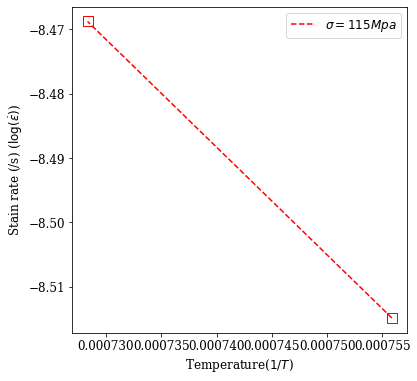

The slope of the given line is: -1673.21


In [28]:
plot_strainrateVStemp(SSTP_data)

Given the slope is $-1673.21$. 

$\implies$
$$\frac{-Q}{R} = 1673.21$$
$$Q_{115MPa} = 13.9KJ/mol$$

# Reference :
[1] ```
CREEP OF CMSX-4 SUPERALLOY SINGLE CRYSTALS: EFFECTS OF RAFTING AT HIGH TEMPERATURE
R. C. REED, N. MATAN, D. C. COX, M. A. RIST and C. M. F. RAE
Department of Materials Science and Metallurgy, University of Cambridge/Rolls-Royce University Technology  Centre, Pembroke Street, Cambridge CB2 3QZ, U.K.
```